# <h1 style='background:#AC7E7E; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:white'><center>Laptop price prediction </center></h1> 
 

![](https://media.istockphoto.com/vectors/elearning-and-education-vector-id520409700?k=20&m=520409700&s=612x612&w=0&h=ZU7TaNryp01YTgUmvKSNZXDu1-KSTcYSoK-mHTmVX_I=)

Hi Everyone, this notebook is about the Price Prediction of a dataset contaning data about laptops. We'll use pandas, numpy and re packages for data manipulation, matplotlib and seaborn for data visualization & Randomforest Regression for this model.

## <h1 style='background:#AC7E7E; border:2; border-radius: 20px; font-size:250%; font-weight: bold; color:white'><center>Importing Libraries</center></h1>

In [1]:
# Data wrangling
import pandas as pd
import numpy as np

# for Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

# Model
from sklearn.ensemble import RandomForestRegressor

## <h1 style='background:#AC7E7E; border:2; border-radius: 20px; font-size:250%; font-weight: bold; color:white'><center>Understanding the data</center></h1>

In [2]:
# Loading the Dataset
df = pd.read_csv('../input/laptop-price-dataset/laptop_data.csv')

In [3]:
# Looking the first 5 rows 
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
print(f'The DataSet Contains {df.shape[0]} rows & {df.shape[1]} columns.')

The DataSet Contains 1303 rows & 12 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


* here, we can see that the Columns - Ram, Memory & Weight have data type of Object we will convert to numeric data type in cleaning process.

In [6]:
# Chcecking for duplicates 
df.duplicated().sum()

0

* there is no duplicates values in dataset.

In [7]:
# Checking if there any null values in our dataset
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

* So, there is no null values in data set & that's cool.

## <h1 style='background:#AC7E7E; border:2; border-radius: 20px; font-size:250%; font-weight: bold; color:white'><center>Cleaning and Preprcessing </center></h1>

In [8]:
# Droping the unnamed column s
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [9]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [10]:
# Removing the GB string form Ram column
df['Ram'] = df['Ram'].str.replace('GB', '')

In [11]:
## Removing the KG string form weight column
df['Weight'] = df['Weight'].str.replace('kg', '')

In [12]:
# Changing the dtype of column - Ram and Weight Column
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## <h1 style='background:#AC7E7E; border:2; border-radius: 20px; font-size:250%; font-weight: bold; color:white'><center>Feature Analysis</center></h1>

#### 4.1 Price

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

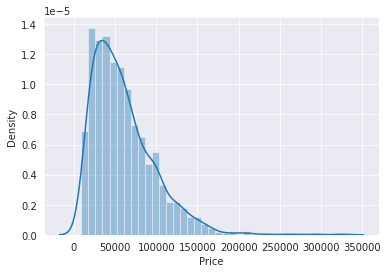

In [14]:
# Price Distribution.
sns.distplot(df['Price'])

In [15]:
# Making function for count plot
font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
                  'verticalalignment':'bottom'}

def countplot(column, xlabel, ylabel, title):
    plt.figure(figsize = (18,7))
    plot = sns.countplot(x= column, data = df)
    plt.setp(plot.get_xticklabels(), rotation=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel, **font)
    plt.title(title, **font)
    plt.show()

#### 4.2 Company

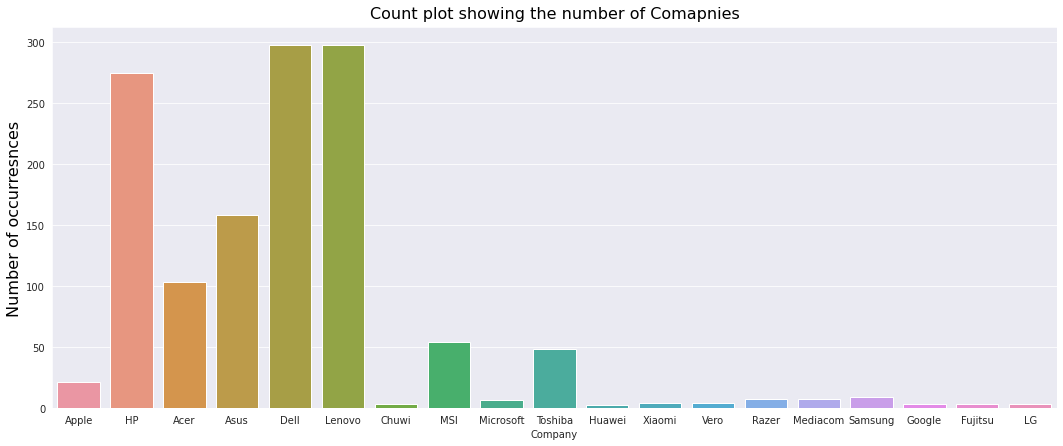

In [16]:
countplot('Company', 'Company', 'Number of occurresnces', 'Count plot showing the number of Comapnies')

* Most of the laptop brands are Dell, lenovo and Hp.

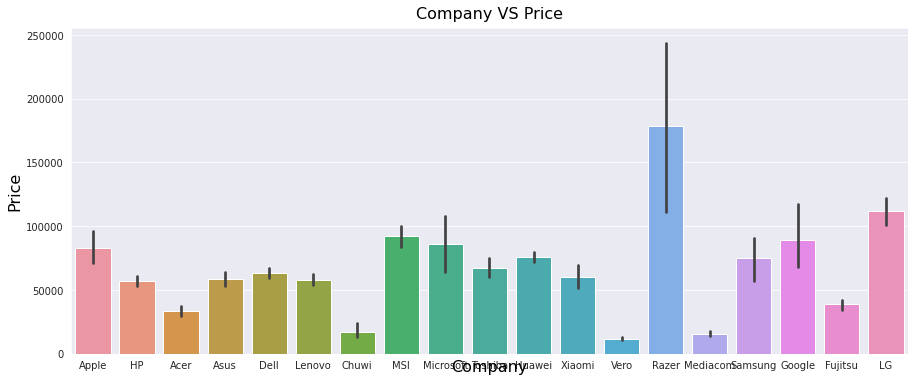

In [17]:
plt.figure(figsize = (15,6))
plot = sns.barplot(x = df['Company'], y= df['Price'])
plt.xticks(rotation = 'vertical')
plt.setp(plot.get_xticklabels(), rotation=0)
plt.xlabel('Company',  **font)
plt.ylabel('Price', **font)
plt.title('Company VS Price', **font)
plt.show()
plt.show()

* Here, we can see that laptop Razer brands are expensive than other.

#### 4.3 TypeName

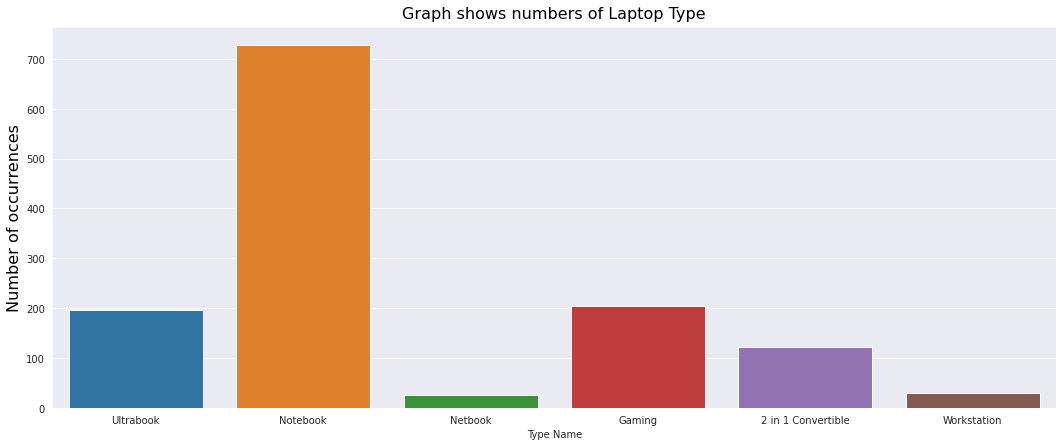

In [18]:
countplot('TypeName', 'Type Name', 'Number of occurrences', 'Graph shows numbers of Laptop Type')

* Laptop type Notebook are the most in the data set

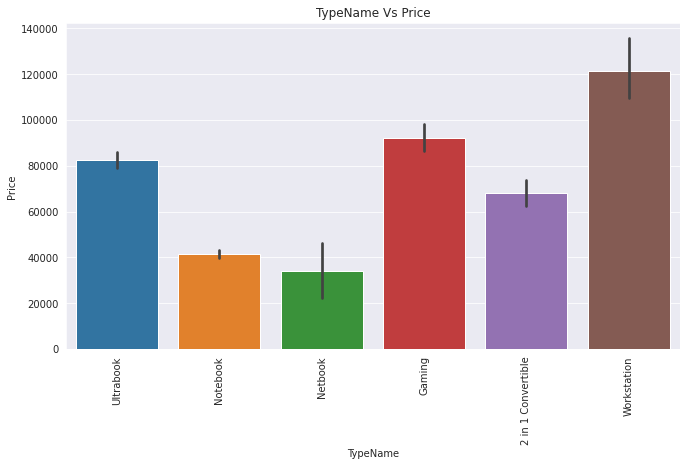

In [19]:
plt.figure(figsize = (11,6))
sns.barplot(x = df['TypeName'], y= df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('TypeName Vs Price')
plt.show()

* Workstation are the most costly than others.

#### 4.4 Size(inch)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

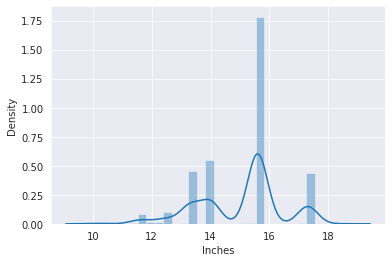

In [20]:
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

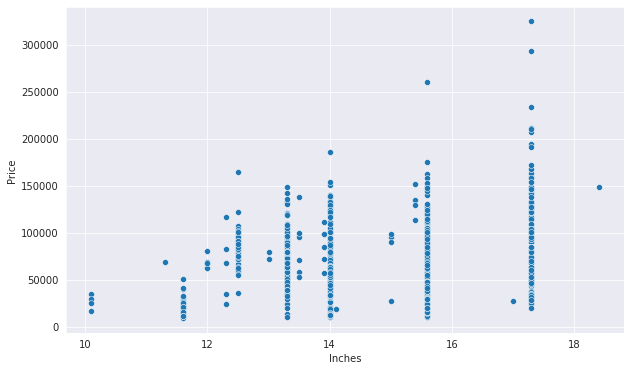

In [21]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = df['Inches'], y = df['Price'])

* from above graph we can see that the higher the size of laptop screeen the higher the price of laptop.
* inshort Size does matter :)

## <h1 style='background:#AC7E7E; border:2; border-radius: 20px; font-size:250%; font-weight: bold; color:white'><center>Feature Engineering</center></h1>

In [22]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [23]:
# Fetching touchscreen data from screenresolution column
df['touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)

In [24]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen
942,Acer,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.23,32980.32,0
65,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,1.80,105654.24,0
1191,Samsung,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53 2.0GHz,4,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1


#### 4.5 Screenresolution

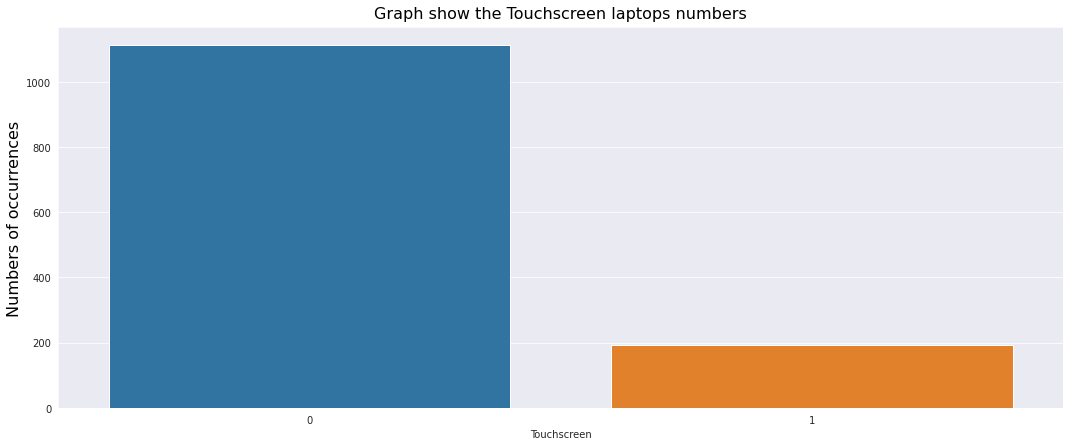

In [25]:
countplot('touchscreen','Touchscreen', 'Numbers of occurrences', 'Graph show the Touchscreen laptops numbers')

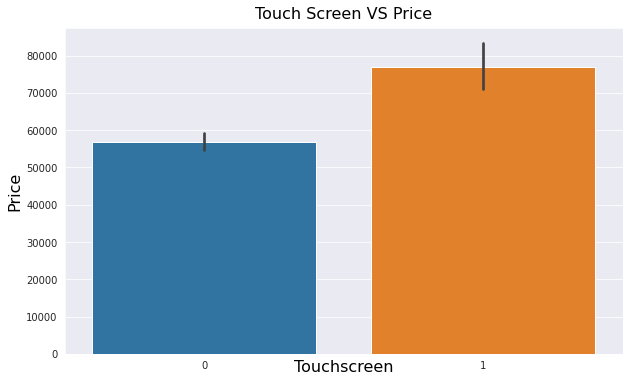

In [26]:
plt.figure(figsize = (10,6))
sns.barplot(x = df['touchscreen'], y = df['Price'])
plt.title('Touch Screen VS Price', ** font)
plt.xlabel('Touchscreen', **font)
plt.ylabel('Price', **font)
plt.show()

In [27]:
# Fetching if Ips pannel is present in Screenresolution and storing it in new column
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [28]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips
688,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,AMD A10-Series 9600P 2.4GHz,6,2TB HDD,AMD Radeon R7 M440,Windows 10,2.65,30316.3200,0,1
850,HP,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,128GB SSD,Intel HD Graphics 400,No OS,1.86,15930.7200,0,0
30,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89,13053.0672,0,0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


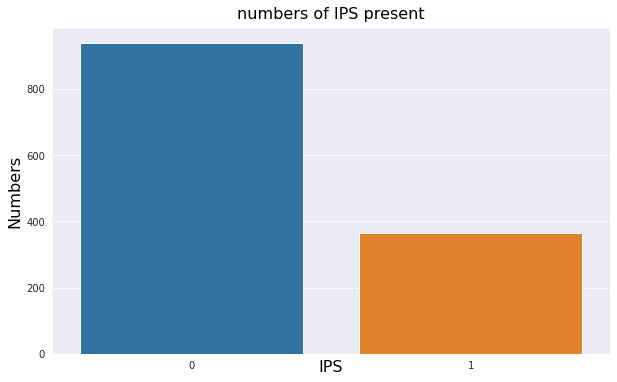

In [29]:
plt.figure(figsize = (10,6))
sns.countplot(df['Ips'])
plt.title('numbers of IPS present', ** font)
plt.xlabel('IPS', **font)
plt.ylabel('Numbers', **font)
plt.show()

* Non IPs panel laptops are most in dataset

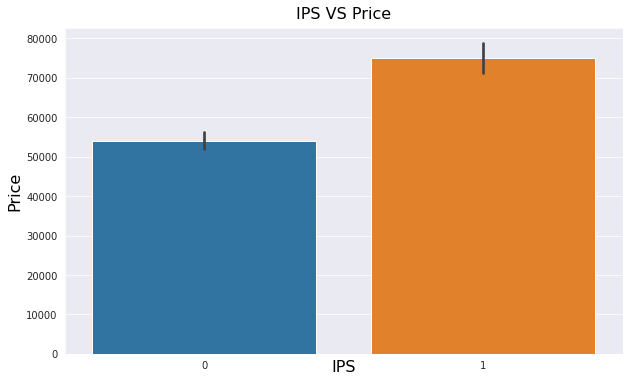

In [30]:
plt.figure(figsize = (10,6))
sns.barplot(x = df['Ips'], y = df['Price'])
plt.title('IPS VS Price', ** font)
plt.xlabel('IPS', **font)
plt.ylabel('Price', **font)
plt.show()

* we can see that the price of laptops also depend on ips panel 

#### fetching x resolution & y resolution from the screen resolution column

In [31]:
res = df['ScreenResolution'].str.split('x', n =1, expand = True)

In [32]:
df['X_res'] = res[0]
df['Y_res'] = res[1]

In [33]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [34]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [36]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [38]:
df['ppi'] = (((df['X_res'] **2) + (df['Y_res'] **2)) **0.5) / df['Inches'].astype('float')

In [39]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [40]:
df.drop(columns = ['X_res', 'Y_res', 'Inches', 'ScreenResolution'], inplace = True)

In [41]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [42]:
df['CpuName'] = df['Cpu'].apply(lambda x :" " .join(x.split()[:3]))

In [43]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [44]:
df['Cpu brand'] = df['CpuName'].apply(fetch_processor)

In [45]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,CpuName,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [46]:
df.drop(columns = ['Cpu', 'CpuName'], inplace = True)

In [47]:
df.head(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5


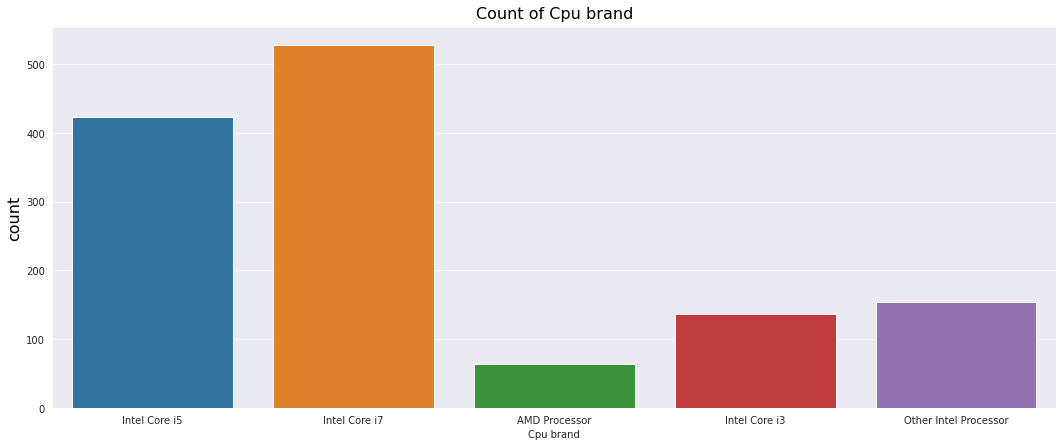

In [48]:
countplot('Cpu brand', 'Cpu brand', 'count', 'Count of Cpu brand')

* Cpu brand Intel i7 and i5 are the most in the dataset

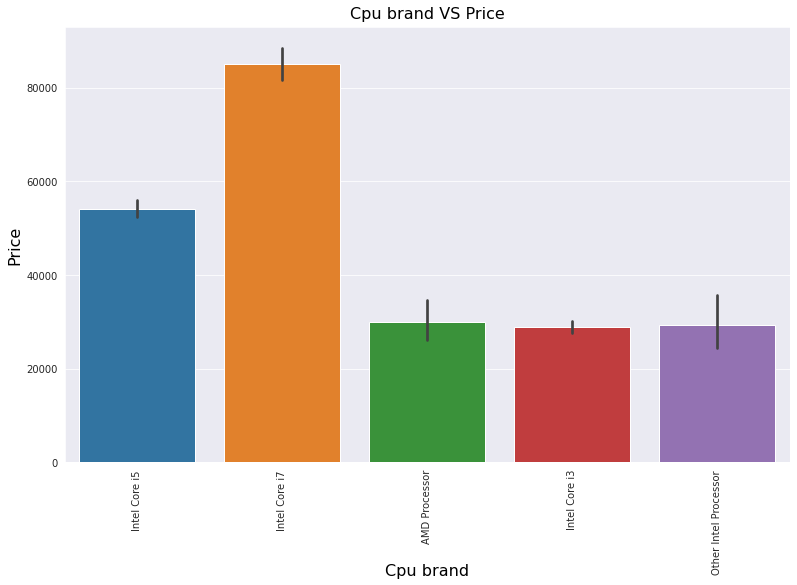

In [49]:
plt.figure(figsize = (13,8))
sns.barplot(x = 'Cpu brand', y = 'Price', data = df)
plt.xticks(rotation = 90)
plt.xlabel('Cpu brand',  **font)
plt.ylabel('Price', **font)
plt.title('Cpu brand VS Price', **font)
plt.show()

* Pocessor Intel i7 are costly than all others.

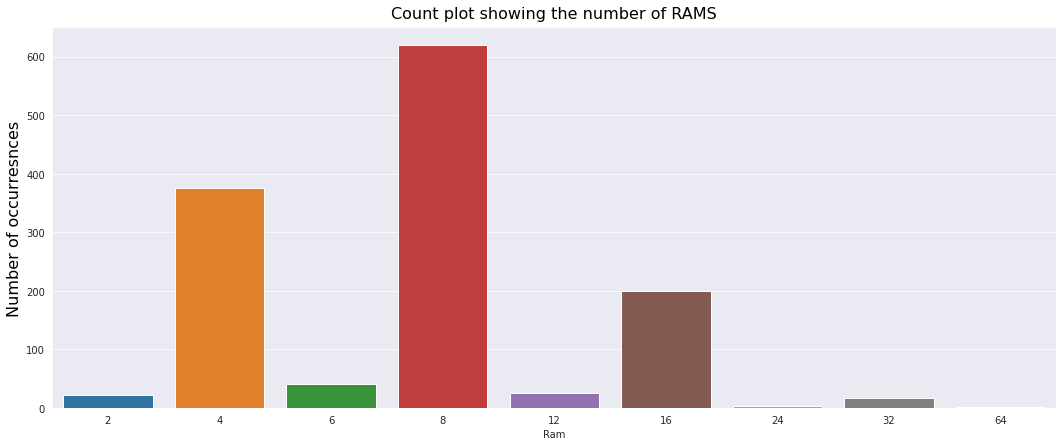

In [50]:
countplot('Ram', 'Ram', 'Number of occurresnces', 'Count plot showing the number of RAMS')

* Laptop with 8 GB rams are the most in the dataset.

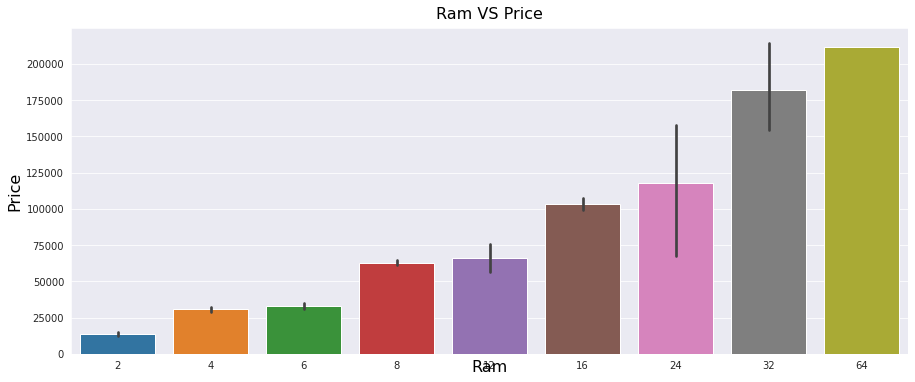

In [51]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'Ram', y = 'Price', data = df)
plt.xlabel('Ram',  **font)
plt.ylabel('Price', **font)
plt.title('Ram VS Price', **font)
plt.show()

* here we can see that the Size does matter :)

In [52]:
# In memory column it have many different disk sapce categories fetching only hdd and ssd form memory column and storing it in a new column.
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [53]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex = True)

#Replacing GB to ''(null or empty)
df['Memory'] = df['Memory'].str.replace('GB', '')

#Replacing TB to 000 (1TB = 1000GB)
df['Memory'] = df['Memory'].str.replace('TB', '000')

In [54]:
new = df['Memory'].str.split('+', n=1, expand =True)

In [55]:
new.value_counts()

0                  1            
128 SSD              1000 HDD       94
256 SSD              1000 HDD       73
512 SSD              1000 HDD       14
256 SSD              2000 HDD       10
512 SSD              2000 HDD        3
1000 SSD             1000 HDD        2
128 SSD              2000 HDD        2
256 SSD              256 SSD         2
                     500 HDD         2
1000 HDD             1000 HDD        1
256 SSD              1000 Hybrid     1
512 SSD              1000 Hybrid     1
                     256 SSD         1
                     512 SSD         1
64 Flash Storage     1000 HDD        1
dtype: int64

In [56]:
df['first'] = new[0]

In [57]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [58]:
df["first"]=df["first"].str.strip()

In [59]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [60]:
df['second'] = new[1]

In [61]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,first,second
546,Lenovo,Notebook,4,500 HDD,Intel HD Graphics 620,Windows 10,1.87,41824.8000,0,0,157.350512,Intel Core i5,500 HDD,None
651,Acer,Gaming,8,1000 HDD,Nvidia GeForce GTX 1050,Linux,2.40,37775.5200,0,0,141.211998,Intel Core i5,1000 HDD,None
1281,Dell,Notebook,8,1000 HDD,AMD Radeon R5 M430,Linux,2.30,42943.1472,0,0,100.454670,Intel Core i7,1000 HDD,None
953,Asus,2 in 1 Convertible,8,64 Flash Storage,Intel HD Graphics 515,Chrome OS,1.20,61751.5200,0,0,176.232574,Other Intel Processor,64 Flash Storage,None
749,HP,Workstation,16,256 SSD,Nvidia Quadro M2000M,Windows 7,3.00,233845.9200,0,1,127.335675,Other Intel Processor,256 SSD,None


In [62]:
df['first'].unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '64 Flash Storage', '32 SSD', '2000 HDD', '64 SSD', '1000 Hybrid',
       '1000 SSD', '16 SSD', '16 Flash Storage', '180 SSD', '32 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid'],
      dtype=object)

In [63]:
df['Layer1hdd'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1ssd'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)

In [64]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,first,second,Layer1hdd,Layer1ssd
753,Lenovo,Ultrabook,4,180 SSD,Intel HD Graphics 520,Windows 10,1.70,58394.8800,0,0,157.350512,Intel Core i5,180 SSD,None,0,1
983,Fujitsu,Notebook,4,256 SSD,Intel HD Graphics 520,Windows 10,2.30,34578.7200,0,0,100.454670,Intel Core i5,256 SSD,None,0,1
669,Acer,Notebook,4,128 SSD,Intel HD Graphics 520,Linux,2.10,21951.3600,0,0,100.454670,Intel Core i3,128 SSD,None,0,1
1119,Asus,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,3.52,69929.4672,0,0,127.335675,Intel Core i7,128 SSD,1000 HDD,0,1
688,HP,Notebook,6,2000 HDD,AMD Radeon R7 M440,Windows 10,2.65,30316.3200,0,1,127.335675,AMD Processor,2000 HDD,None,1,0


In [65]:
df['first'] = df['first'].str.replace(r'\D', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [66]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,first,second,Layer1hdd,Layer1ssd
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,None,0,1
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,None,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,None,0,1
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,None,0,1
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,None,0,1


In [67]:
df["second"].fillna("0", inplace = True)
df["Layer2hdd"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2ssd"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df['second'] = df['second'].str.replace(r'\D', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [68]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,first,second,Layer1hdd,Layer1ssd,Layer2hdd,Layer2ssd
592,Dell,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 615,Windows 10,1.39,32127.8400,1,0,135.094211,Other Intel Processor,128,0,0,1,0,0
1254,Dell,Notebook,4,500 HDD,Intel HD Graphics,Windows 10,2.20,23655.7872,0,0,100.454670,Other Intel Processor,500,0,1,0,0,0
953,Asus,2 in 1 Convertible,8,64 Flash Storage,Intel HD Graphics 515,Chrome OS,1.20,61751.5200,0,0,176.232574,Other Intel Processor,64,0,0,0,0,0
334,Asus,Gaming,8,256 SSD,Nvidia GeForce GTX 1050,Windows 10,2.50,53226.7200,0,0,141.211998,Intel Core i7,256,0,0,1,0,0
87,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.96,31914.1872,0,0,141.211998,Intel Core i5,256,0,0,1,0,0


In [69]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [70]:
df["HDD"]=(df["first"]*df["Layer1hdd"]+df["second"]*df["Layer2hdd"])
df["SSD"]=(df["first"]*df["Layer1ssd"]+df["second"]*df["Layer2ssd"])

In [71]:
df.drop(columns=['first', 'second', 'Layer1hdd', 'Layer1ssd',
                 'Layer2hdd', 'Layer2ssd'],inplace=True)

In [72]:
df.drop(columns = 'Memory', inplace = True)

In [73]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [74]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [75]:
df['Gpu brand']  = df['Gpu'].apply(lambda x:x.split()[0])

In [76]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [77]:
df = df[df['Gpu brand'] != 'ARM']

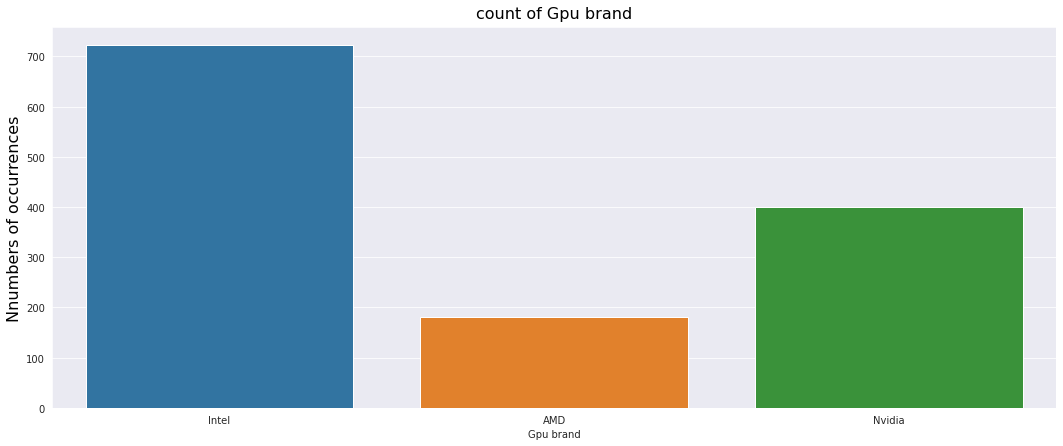

In [78]:
countplot('Gpu brand', 'Gpu brand', 'Nnumbers of occurrences', 'count of Gpu brand')

* Intel GPU are the most in dataset.

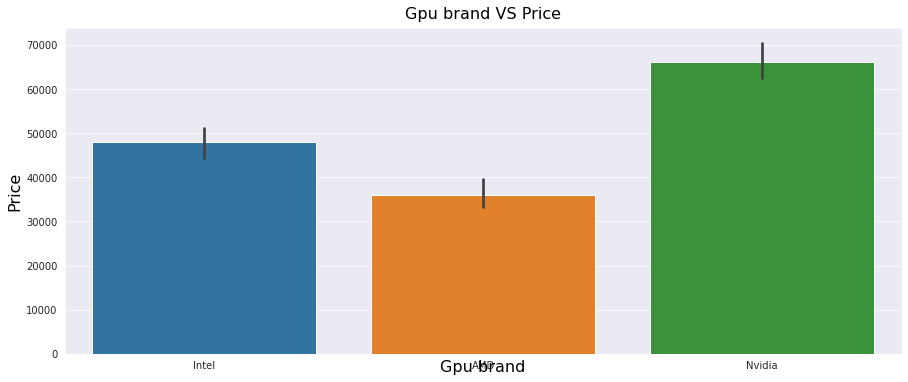

In [79]:
plt.figure(figsize = (15,6))
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xlabel('Gpu brand',  **font)
plt.ylabel('Price', **font)
plt.title('Gpu brand VS Price', **font)
plt.show()


In [80]:
df.drop(columns=['Gpu'],inplace=True)

In [81]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [82]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [83]:
def cat_os(os):
    if os == 'Windows 10' or os == 'Windows 7' or os == 'Windows 10 S':
        return 'Windows'
    elif os == 'Mac OS X' or os == 'macOS':
        return 'Mac'
    else:
        return 'others/NO OS/Linux'

In [84]:
df['OS'] = df['OpSys'].apply(cat_os)

In [85]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,others/NO OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [86]:
df.drop(columns = 'OpSys', inplace = True)

In [87]:
df.sample(3)

,Company,TypeName,Ram,Weight,Price,touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
107,Asus,Ultrabook,8,1.30,63563.04,0,1,157.350512,Intel Core i7,0,256,Nvidia,Windows
181,Dell,Ultrabook,8,1.23,74538.72,0,0,165.632118,Intel Core i5,0,256,Intel,Windows
1128,Lenovo,Gaming,8,2.40,52693.92,0,1,141.211998,Intel Core i5,1000,128,Nvidia,others/NO OS/Linux


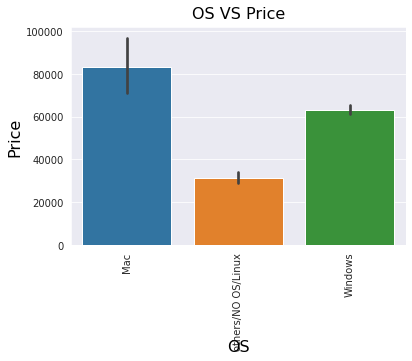

In [88]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.xlabel('OS',  **font)
plt.ylabel('Price', **font)
plt.title('OS VS Price', **font)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

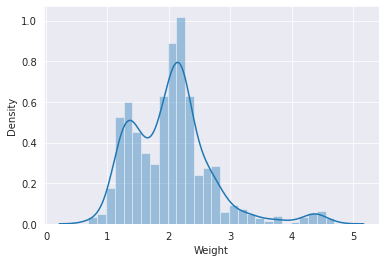

In [89]:
sns.distplot(df['Weight'])

Text(0.5, 1.0, 'Weight VS Price')

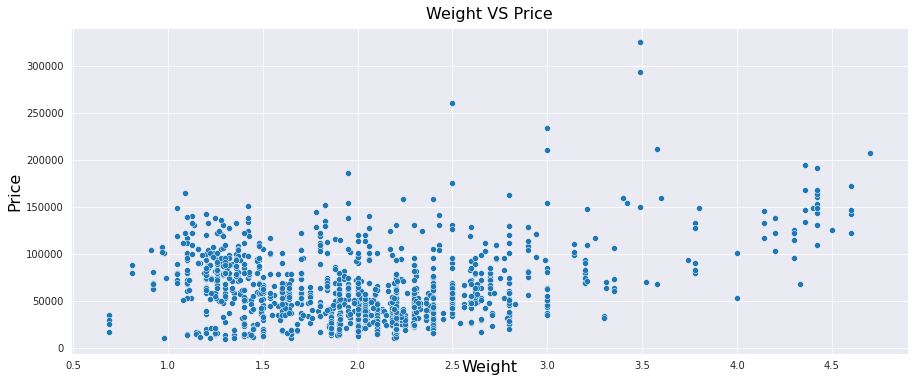

In [90]:
plt.figure(figsize = (15,6))
sns.scatterplot(x=df['Weight'],y=df['Price'])
plt.xlabel('Weight',  **font)
plt.ylabel('Price', **font)
plt.title('Weight VS Price', **font)

In [91]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

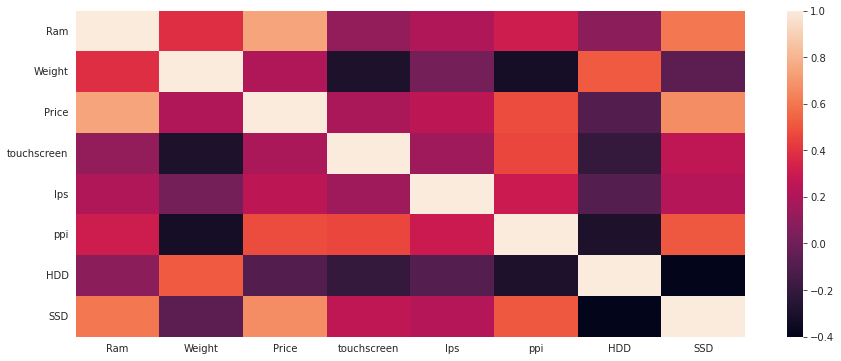

In [92]:
plt.figure(figsize = (15,6))
sns.heatmap(df.corr())

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

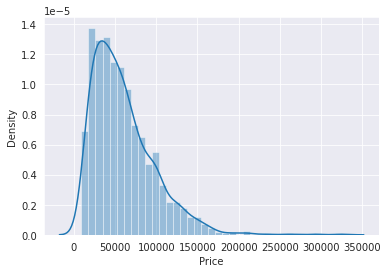

In [93]:
sns.distplot(df['Price'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

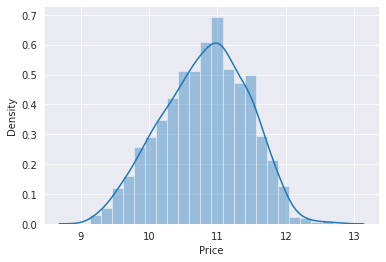

In [94]:
# Normalizing the price using log 
sns.distplot(np.log(df['Price']))

In [95]:
X = df.drop(columns=['Price'])
Y = np.log(df['Price'])

In [96]:
X.head()

,Company,TypeName,Ram,Weight,touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,others/NO OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [97]:
Y.head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64

In [98]:
# Spliting the dataset.
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=5)

## <h1 style='background:#AC7E7E; border:2; border-radius: 20px; font-size:250%; font-weight: bold; color:white'><center>RandomForestRegressor</center></h1>

In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=300,
                              random_state=1,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=20)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9150123959096494
MAE 0.1424436083778887



* **I used Random forest for model and got accuracy of 91**

<div style='background:#5642C5; border:2; border-radius: 10px;letter-spacing:0.5px; font-size:110%; font-family:Verdana'>
    <p style="padding: 15px;
              color:white;">
        Hopefully you like this kernel, i'm beginner & learning data science,i would like you to share your suggestion and opinions it will help me to improve also an upvote motivate me to work more hard.. Thanku:) </p> </div>